<a href="https://colab.research.google.com/github/Hitansh159/match-filter/blob/main/clonvo_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!rm -r dataset/train

In [31]:
!cp drive/MyDrive/train.zip ./

In [ ]:
!unzip train.zip 

In [91]:
!cp drive/MyDrive/test.zip ./

In [ ]:
!unzip test.zip

In [110]:
!cp train.zip ./drive/MyDrive/

In [112]:
!cp -r model* drive/MyDrive/

In [98]:
import tensorflow as tf
import numpy as np
import librosa
import os 
import pandas as pd
import numpy as np
import soundfile as sf
import IPython
import matplotlib.pyplot as plt
import csv
import sys
import json
import time
csv.field_size_limit(sys.maxsize)
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="false"

9223372036854775807

In [ ]:
# dataset_frame = pd.read_csv('./dataset/target.csv')

In [ ]:
# dataset_frame.rename(columns={'Unnamed: 0': 'filename'}, inplace=True)

In [ ]:
# dataset_frame['filename'] = dataset_frame['filename'].apply(lambda x: f'./dataset/narendra modi/{x}.wav')

In [43]:
def convert_string_to_array(y):
  # y = list(map(lambda x : float(x), s[1:-1].split(',') ))
  kernel = 257
  res = []
  for i in range(0, len(y), kernel):
    if sum(y[i: i+kernel]):
      res.append(1)
    else:
      res.append(0)
  return res

In [ ]:
# dataset_frame['y'] = dataset_frame['y'].apply(convert_string_to_array)

In [ ]:
# dataset_frame

,filename,y
0,./dataset/narendra modi/0.wav,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,./dataset/narendra modi/1.wav,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,./dataset/narendra modi/2.wav,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,./dataset/narendra modi/3.wav,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,./dataset/narendra modi/4.wav,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
811,./dataset/narendra modi/811.wav,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."
812,./dataset/narendra modi/812.wav,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
813,./dataset/narendra modi/813.wav,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
814,./dataset/narendra modi/814.wav,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [44]:
def dataloader(total):
  item = 0
  while item < total:
    audio, sr = librosa.load(f'dataset/narendra modi/{item}.wav')
    if len(audio) < 220500:
      audio = np.pad(audio, (0,220500-len(audio)), 'constant', constant_values=0)
    
    y = json.load(open(f'dataset/narendra modi/{item}.json', 'r'))['y']
    y = convert_string_to_array(y)

    yield audio.reshape((220500, 1)), y 
    item += 1

In [94]:
def testloader(total):
  item = 0
  while item < total:
    audio, sr = librosa.load(f'dataset/test/narendra modi/{item}.wav')
    if len(audio) < 220500:
      audio = np.pad(audio, (0,220500-len(audio)), 'constant', constant_values=0)
    
    y = json.load(open(f'dataset/test/narendra modi/{item}.json', 'r'))['y']
    y = convert_string_to_array(y)

    yield audio.reshape((220500, 1)), y 
    item += 1

In [46]:
ds_genrator = tf.data.Dataset.from_generator(dataloader, args=[2000], output_types=(tf.float64, tf.float64),
                                             output_shapes=(
                                                            tf.TensorShape((220500, 1)),
                                                            tf.TensorShape((858))))

In [95]:
test_genrator = tf.data.Dataset.from_generator(testloader, args=[500], output_types=(tf.float64, tf.float64),
                                             output_shapes=(
                                                            tf.TensorShape((220500, 1)),
                                                            tf.TensorShape((858))))

In [7]:
# model0 = tf.keras.Sequential()
# model0.add(tf.keras.layers.Conv1D(32, 1, padding='valid'))
# model0.add(tf.keras.layers.MaxPooling1D(pool_size=2))
# model0.add(tf.keras.layers.Conv1D(64, 1, padding='valid'))
# model0.add(tf.keras.layers.MaxPooling1D(pool_size=2))
# model0.add(tf.keras.layers.Conv1D(128, 3, padding='valid'))
# model0.add(tf.keras.layers.MaxPooling1D(pool_size=4))
# model0.add(tf.keras.layers.Conv1D(256, 3, padding='valid'))
# model0.add(tf.keras.layers.MaxPooling1D(pool_size=4))
# model0.add(tf.keras.layers.Conv1D(512, 3, padding='valid'))
# model0.add(tf.keras.layers.MaxPooling1D(pool_size=4))
# model0.add(tf.keras.layers.Conv1D(1024, 3, padding='valid'))
# model0.add(tf.keras.layers.LSTM(1024, activation='tanh', return_sequences=True))
# model0.add(tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.1)))
# model0.add(tf.keras.layers.LSTM(1024, activation='tanh', return_sequences=True))
# model0.add(tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.1)))
# model0.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.1))))

In [47]:
model0 = tf.keras.Sequential()
model0.add(tf.keras.layers.Conv1D(32, 1, padding='valid'))
model0.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model0.add(tf.keras.layers.Conv1D(64, 1, padding='valid'))
model0.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model0.add(tf.keras.layers.Conv1D(128, 3,padding='valid'))
model0.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model0.add(tf.keras.layers.Conv1D(256, 3,padding='valid'))
model0.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model0.add(tf.keras.layers.Conv1D(512, 3, padding='valid'))
model0.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model0.add(tf.keras.layers.Conv1D(1024,3,padding='valid'))
model0.add(tf.keras.layers.LSTM(1024, activation='tanh', return_sequences=True))
model0.add(tf.keras.layers.Dense(1024, activation='relu'))
model0.add(tf.keras.layers.LSTM(1024, activation='tanh', return_sequences=True))
model0.add(tf.keras.layers.Dense(1024, activation='relu'))
model0.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(0.1))))

In [48]:
model0.build([None, 220500, 1])
model0.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 220500, 32)        64        
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 110250, 32)        0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 110250, 64)        2112      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 55125, 64)         0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 55123, 128)        24704     
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 13780, 128)        0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 13778, 256)       

In [49]:
# model0.compile(optimizer= 'adam', loss='mse', metrics=['mse'])
# model0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'AUC', 'Recall', 'mse'] )
model0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'AUC', 'Recall', 'mse'] )

In [106]:
history = model0.fit(x= ds_genrator.batch(32), epochs=5, verbose=1 )

Epoch 1/5
63/63 [==============================] - 291s 5s/step - loss: 0.3719 - accuracy: 0.8489 - precision: 0.8459 - auc: 0.8838 - recall: 0.6746 - mse: 0.1136
Epoch 2/5
63/63 [==============================] - 288s 5s/step - loss: 0.3544 - accuracy: 0.8581 - precision: 0.8645 - auc: 0.8911 - recall: 0.6865 - mse: 0.1072
Epoch 3/5
63/63 [==============================] - 288s 5s/step - loss: 0.3590 - accuracy: 0.8564 - precision: 0.8567 - auc: 0.8900 - recall: 0.6891 - mse: 0.1086
Epoch 4/5
63/63 [==============================] - 289s 5s/step - loss: 0.3449 - accuracy: 0.8648 - precision: 0.8704 - auc: 0.8952 - recall: 0.7033 - mse: 0.1034
Epoch 5/5
63/63 [==============================] - 290s 5s/step - loss: 0.3360 - accuracy: 0.8696 - precision: 0.8770 - auc: 0.8991 - recall: 0.7129 - mse: 0.1004


In [107]:
model0.save('./modelv1')

INFO:tensorflow:Assets written to: ./modelv1/assets


INFO:tensorflow:Assets written to: ./modelv1/assets


In [64]:
md = tf.keras.models.load_model('/content/modelv0')

In [66]:
md.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 220500, 32)        64        
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 110250, 32)        0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 110250, 64)        2112      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 55125, 64)         0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 55123, 128)        24704     
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 13780, 128)        0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 13778, 256)       

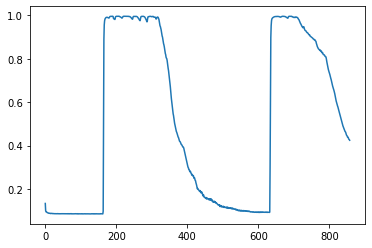

In [73]:
plt.plot(md.predict(ds_genrator.batch(1).take(1))[0])

In [82]:
x_ = []
y_ = []
for i in ds_genrator.take(10):
  x_= i[0]
  y = i[1]

In [89]:
y_ = model0.predict(tf.reshape(x_, [1, 220500, 1]))

In [81]:
import IPython 
IPython.display.Audio('./dataset/narendra modi/10.wav')

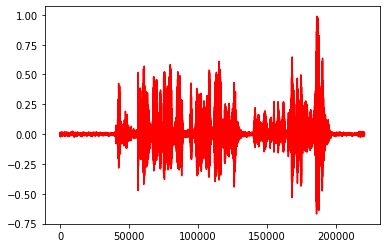

In [84]:
plt.plot(x_, color='red')

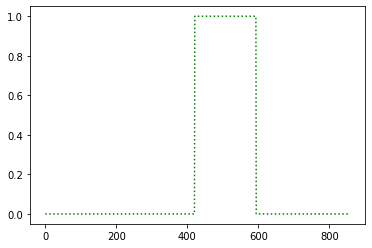

In [85]:
plt.plot(y, color='green', linestyle='dotted')

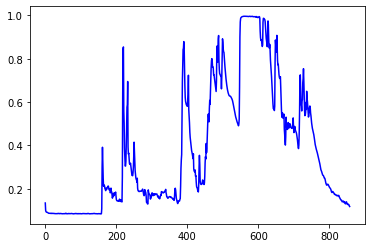

In [90]:
plt.plot(y_[0], color='blue')

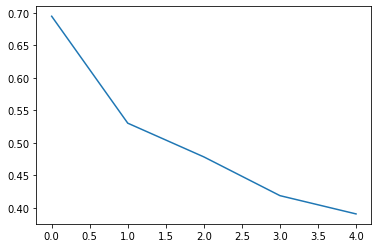

In [57]:
plt.plot(history.history['loss'])

[]

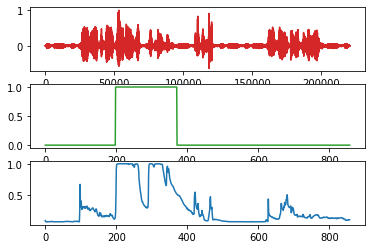

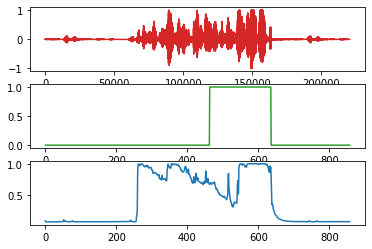

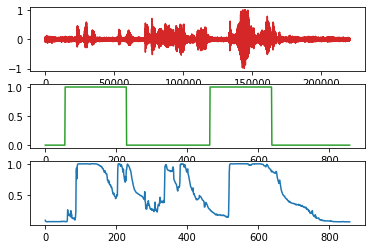

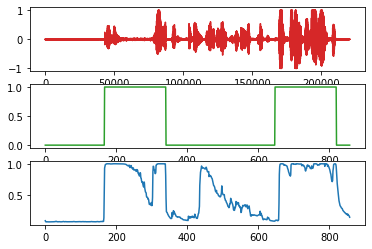

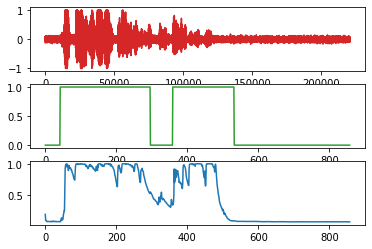

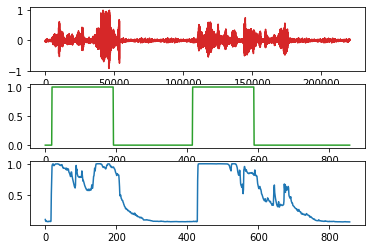

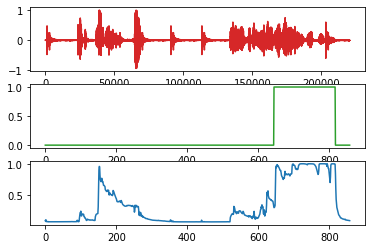

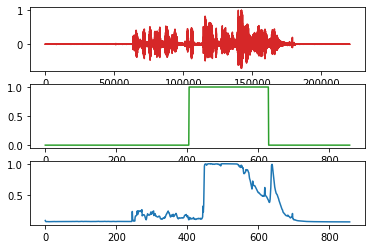

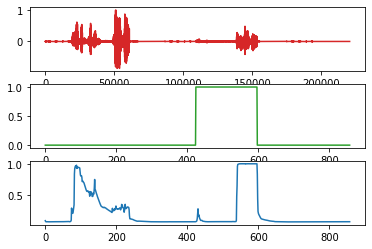

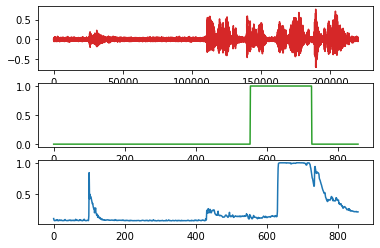

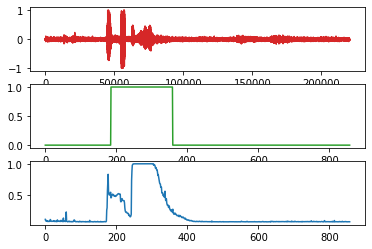

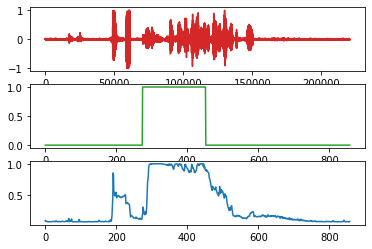

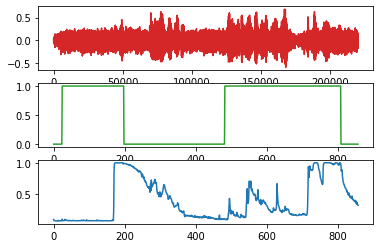

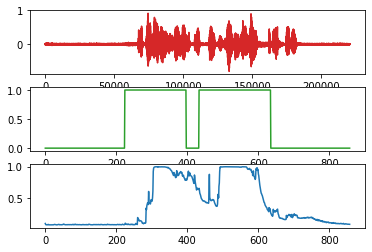

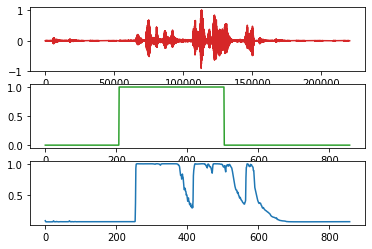

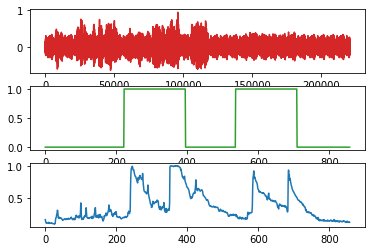

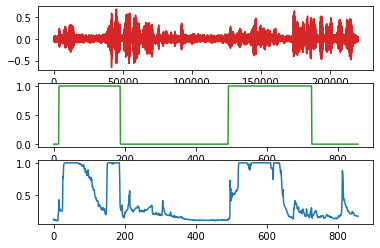

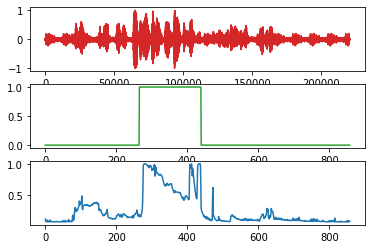

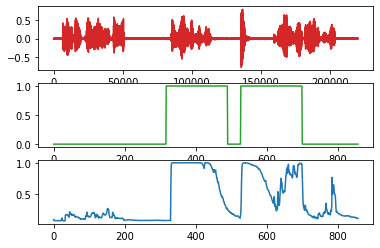

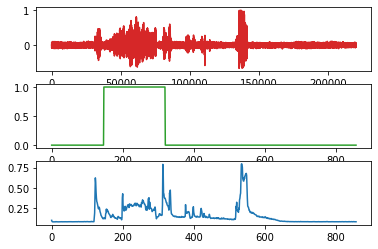

In [108]:
for i in test_genrator.take(20):
  y = i[1]
  y_ = model0.predict(tf.reshape(i[0], [1, 220500, 1]))
  x_ = i[0]

  figure, axis = plt.subplots(3, 1)

  axis[0].plot(x_, 'tab:red')
  axis[1].plot(y, 'tab:green')
  axis[2].plot(y_[0], 'tab:blue')

  IPython.display.clear_output()
  IPython.display.display(plt.plot())

[]

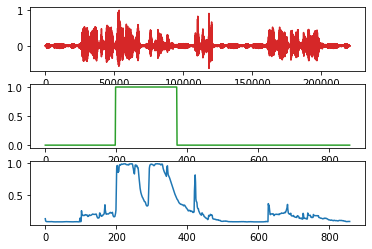

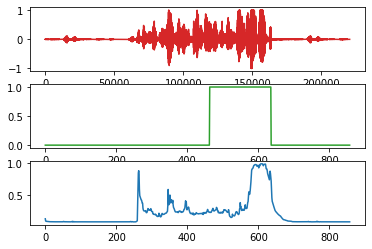

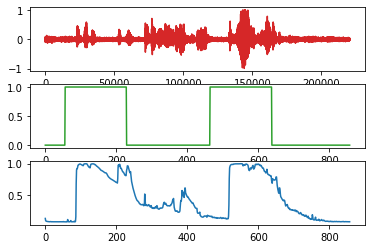

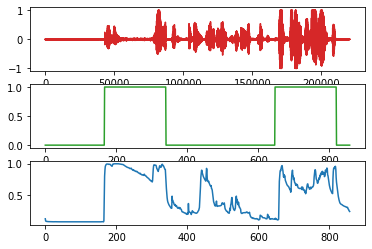

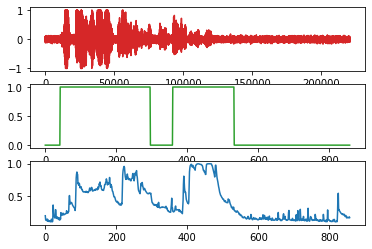

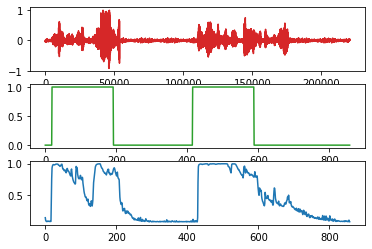

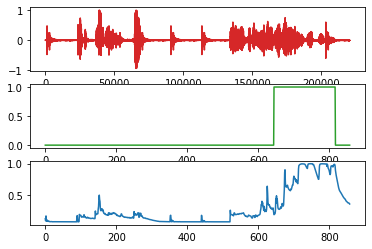

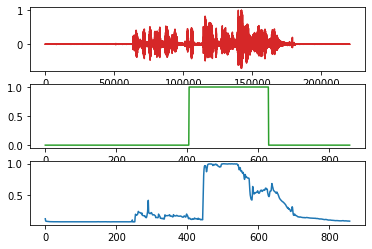

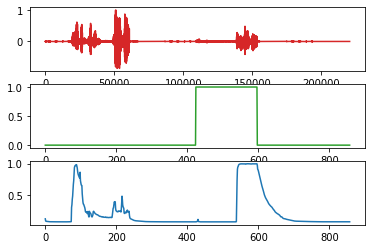

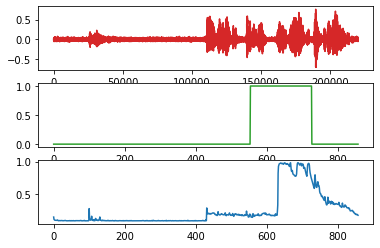

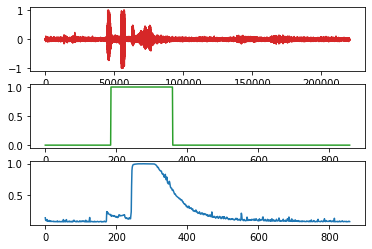

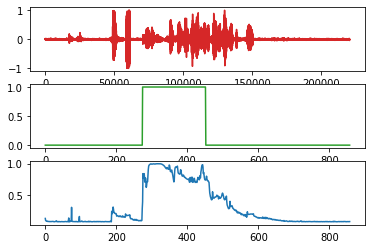

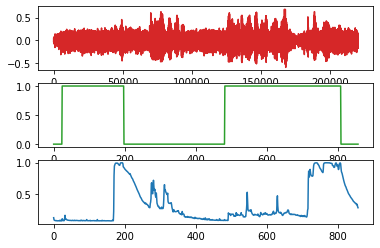

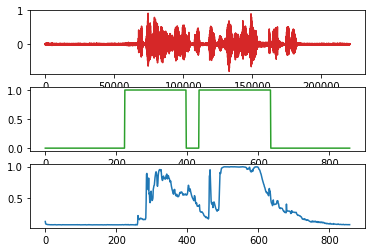

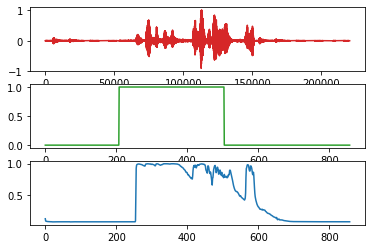

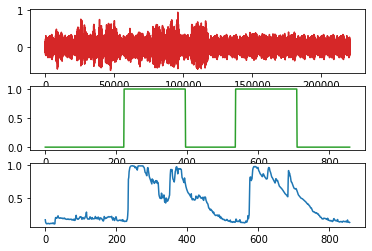

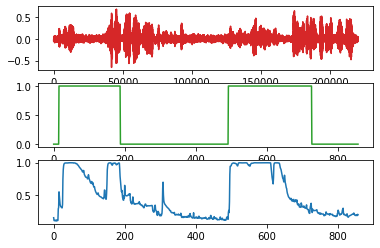

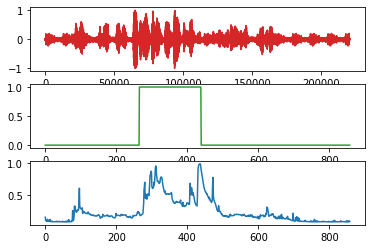

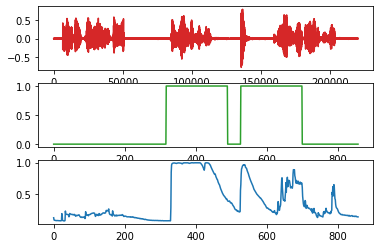

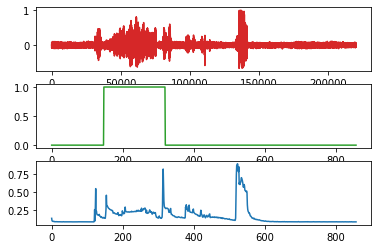

In [109]:
for i in test_genrator.take(20):
  y = i[1]
  y_ = md.predict(tf.reshape(i[0], [1, 220500, 1]))
  x_ = i[0]

  figure, axis = plt.subplots(3, 1)

  axis[0].plot(x_, 'tab:red')
  axis[1].plot(y, 'tab:green')
  axis[2].plot(y_[0], 'tab:blue')

  IPython.display.clear_output()
  IPython.display.display(plt.plot())
